In [1]:
library(PepsNMR)
library(devtools)
library(knitr)

Loading required package: usethis



### User Inputs: Working Directory Path and Data Set Root Directory.

In [2]:
# Check that setdir_path ends with '/'
setdir_path <- '/Users/morris/Box/Hall_Lab/Projects/HUNA/'
data_set_root_dir <- 'MTBLS430'
setwd(setdir_path)

### Creating the HUNA intialization file

In [3]:
path_to_fid <- (paste(setdir_path, data_set_root_dir, '/input/nmr',sep='')) 
norm_bin_500_path <- (paste(setdir_path, data_set_root_dir, '/',
                       'output/PepsNMR_output/',data_set_root_dir,
                       '_PepsNMR_preprocessed_bin500.csv', sep=''))
norm_bin_5000_path <- (paste(setdir_path ,data_set_root_dir, '/',
                       'output/PepsNMR_output/',data_set_root_dir,
                       '_PepsNMR_preprocessed_bin5000.csv', sep=''))
type <- c('setwd_path',
          'data_set_root_dir',
          'path_to_fid',
          'norm_bin_500_path',
          'norm_bin_5000_path')
path <- c(setdir_path,
          data_set_root_dir,
          path_to_fid,
          norm_bin_500_path,
          norm_bin_5000_path)
huna_init_file <- data.frame(type, path)
huna_init_path <- (paste(setdir_path,'/',data_set_root_dir, '/', data_set_root_dir,
                         '_init.csv', sep=''))
write.csv(huna_init_file, file= huna_init_path, row.names=FALSE)

In [4]:
# ==== set graphical parameters =================
# select the index of the spectrum that will be drawn
spectrIndex <- 1
# colors
col1 <-  "gray18"
col2 <- "firebrick1"

In [5]:
#sample_dir <- scan("/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS1/input/sample_dir.txt",
#                   what="", sep="\n")

In [6]:
fidList <- ReadFids(file.path(path_to_fid),subdirs = FALSE, dirs.names = TRUE, verbose=TRUE)
Fid_data <- fidList[["Fid_data"]]
Fid_info <- fidList[["Fid_info"]]
kable(head(Fid_info))
#write.csv(Fid_data, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS1/output/PepsNMR_output/Fid_data.csv")
#write.csv(Fid_info, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS1/output/PepsNMR_output/Fid_info.csv")

Begin ReadFids 
dim Fid_data:  150 16384 
IDs:  1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2501 2502 2503 2504 2505 2506 2507 2508 2509 2510 3101 3102 3103 3104 3105 3106 3107 3108 3109 3110 3201 3202 3203 3204 3205 3206 3207 3208 3209 3210 3301 3302 3303 3304 3305 3306 3307 3308 3309 3310 3401 3402 3403 3404 3405 3406 3407 3408 3409 3410 3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 
non-unique IDs? 0 
End ReadFids 
It lasted 0.721 s user time, 0.247 s system time and 1.706 s elapsed time.




|     |    TD| BYTORDA| DIGMOD| DECIM| DSPFVS|     SW_h|       SW|     O1| GRPDLY|       DT|
|:----|-----:|-------:|------:|-----:|------:|--------:|--------:|------:|------:|--------:|
|1101 | 32768|       0|      3|  1664|     21| 12019.23| 20.02762| 2823.1|     76| 4.16e-05|
|1102 | 32768|       0|      3|  1664|     21| 12019.23| 20.02762| 2823.1|     76| 4.16e-05|
|1103 | 32768|       0|      3|  1664|     21| 12019.23| 20.02762| 2823.1|     76| 4.16e-05|
|1104 | 32768|       0|      3|  1664|     21| 12019.23| 20.02762| 2823.1|     76| 4.16e-05|
|1105 | 32768|       0|      3|  1664|     21| 12019.23| 20.02762| 2823.1|     76| 4.16e-05|
|1106 | 32768|       0|      3|  1664|     21| 12019.23| 20.02762| 2823.1|     76| 4.16e-05|

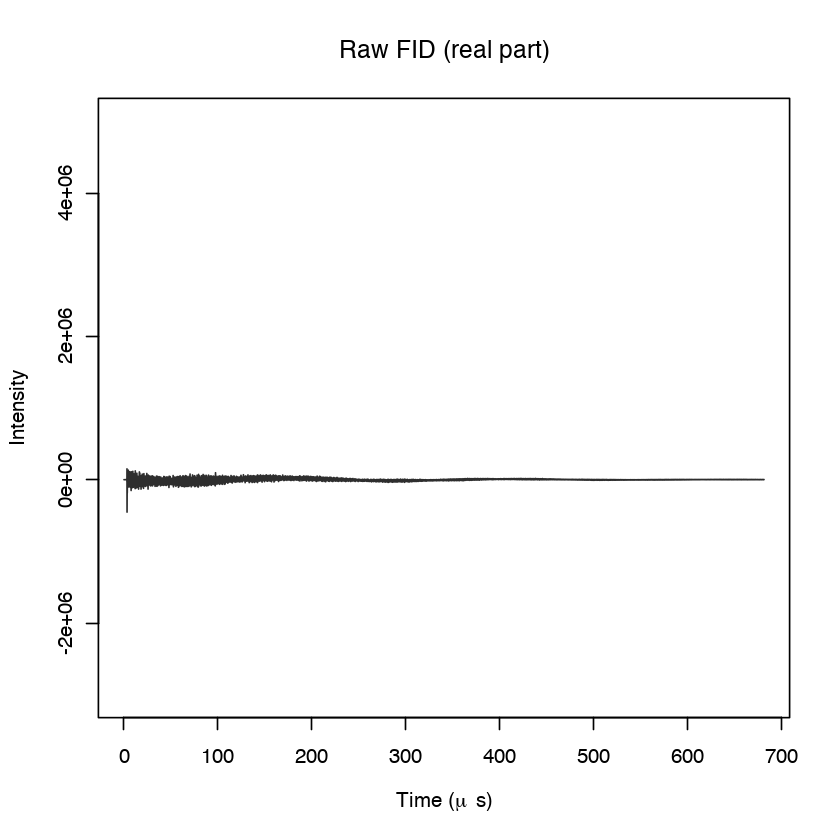

In [7]:
# Visualize raw fid
time <- as.numeric(colnames(Fid_data))*1000
plot(time, Re(Fid_data[spectrIndex,]),type="l", col = col1, xlab=
       expression(paste("Time (", mu,"s)")), ylab = "Intensity", 
     main = "Raw FID (real part)", ylim = c(-3e6,5e6))

In [8]:
# ==== GroupDelayCorrection =================
Fid_data.GDC <- GroupDelayCorrection(Fid_data, Fid_info, verbose =TRUE)

Begin GroupDelayCorrection 
End GroupDelayCorrection 
It lasted 0.77 s user time, 0.067 s system time and 0.842 s elapsed time.


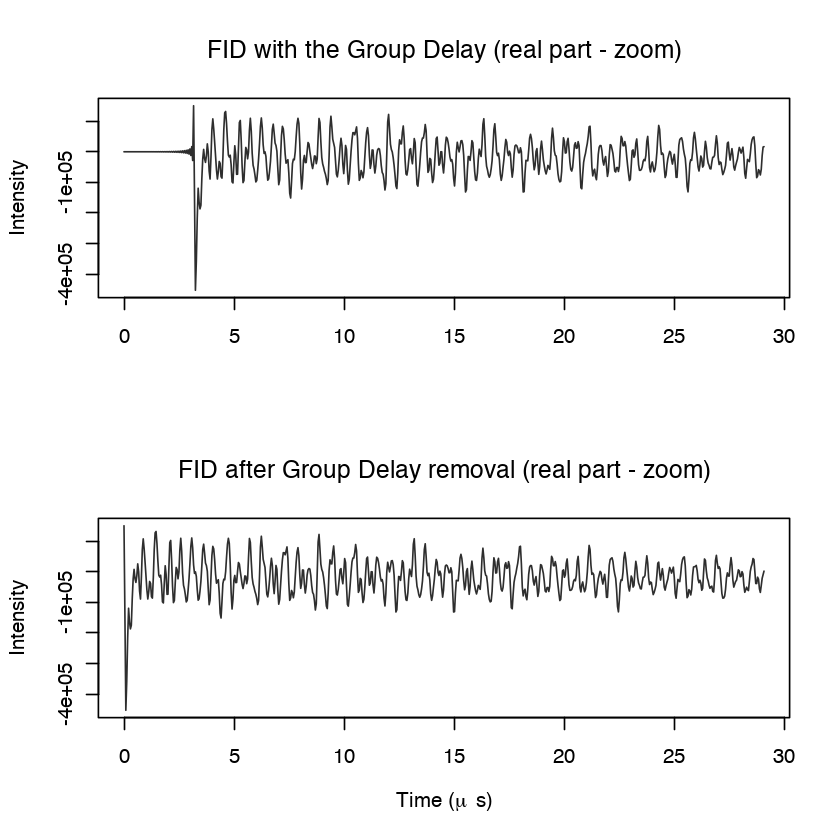

In [9]:
# Visualize changes
par(mfrow=c(2,1))
plot(time[0:700], Re(Fid_data[spectrIndex,0:700]),  
     type = "l", ylab = "Intensity", xlab="", 
     main = "FID with the Group Delay (real part - zoom)", col = col1)
plot(time[0:700], Re(Fid_data.GDC[spectrIndex,0:700]), 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Group Delay removal (real part - zoom)", col = col1)

In [10]:
# ====  SolventSuppression =================
SS.res <- SolventSuppression(Fid_data.GDC, returnSolvent=TRUE)
Fid_data.SS <- SS.res[["Fid_data"]]
SolventRe <- SS.res[["SolventRe"]]

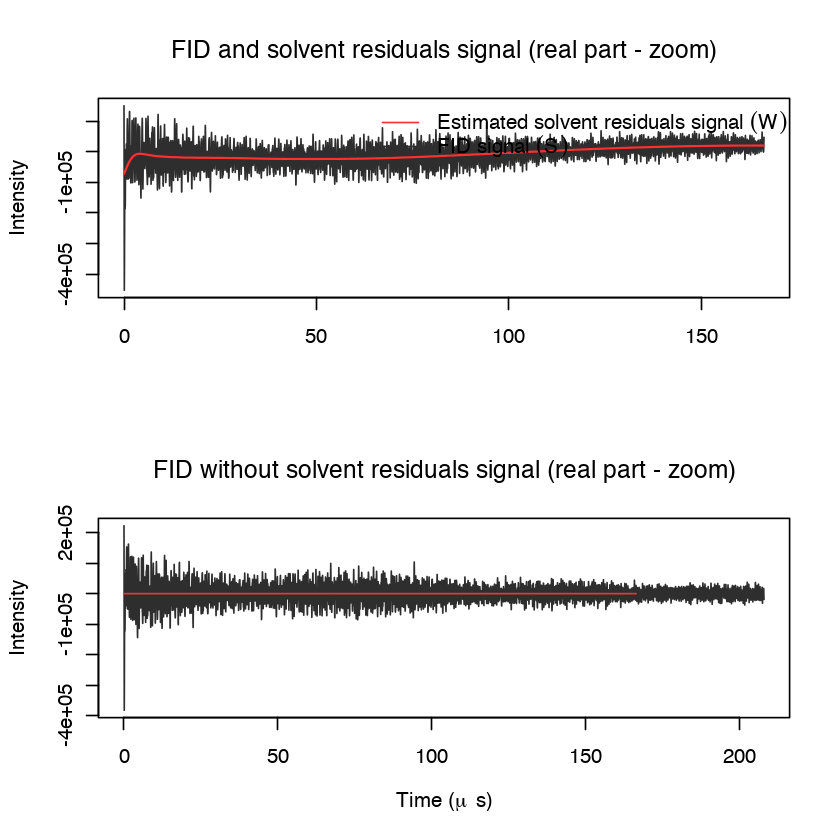

In [11]:
# Visualize changes
par(mfrow=c(2,1))
plot(time[0:4000], Re(Fid_data.GDC[spectrIndex,0:4000]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", 
     main="FID and solvent residuals signal (real part - zoom)")
lines(time[0:4000],SolventRe[spectrIndex,0:4000], col=col2 , lwd = 1.3)
legend("topright", bty = "n", legend = c(expression(paste("Estimated solvent residuals signal ", (italic(W)))), expression(paste("FID signal ", (italic(S))))), 
       col=c(col2, col1),  lty = 1)
plot(time[0:5000], Re(Fid_data.SS[1,0:5000]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID without solvent residuals signal (real part - zoom)")
lines(time[0:4000], rep(0, 4000), col=col2)

In [12]:
# ==== Apodization =================
Fid_data.A <- Apodization(Fid_data.SS, Fid_info)

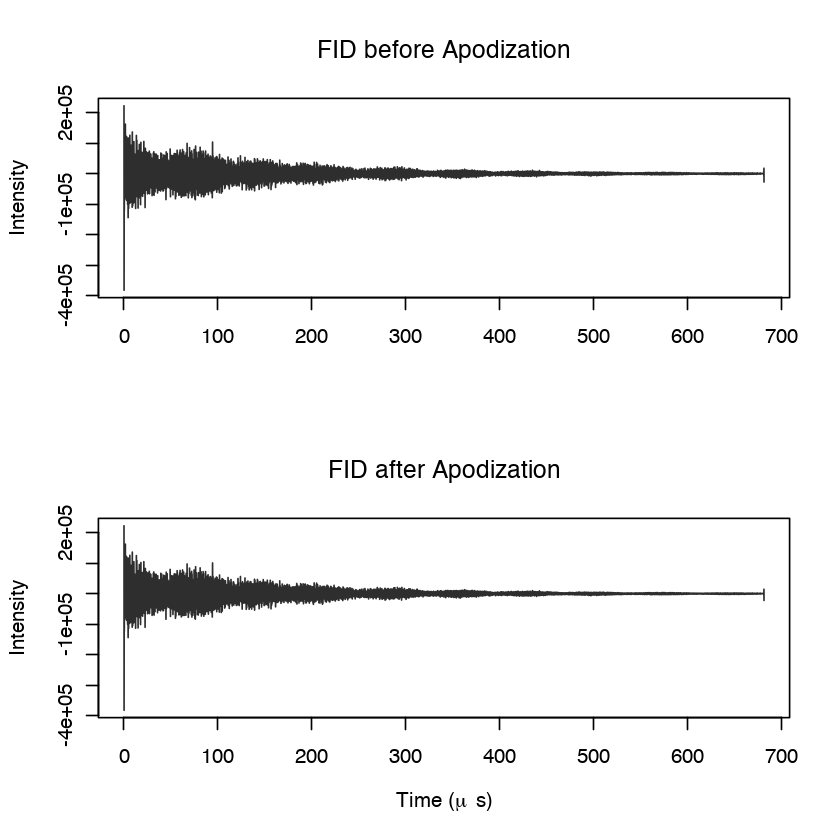

In [13]:
# Visualize changes
par(mfrow=c(2,1))
plot(time, Re(Fid_data.SS[spectrIndex,]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", main="FID before Apodization")
plot(time, Re(Fid_data.A[spectrIndex,]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Apodization")

In [14]:
# ==== Zero Filling =================
Fid_data.ZF <- ZeroFilling(Fid_data.A, fn = ncol(Fid_data.A))

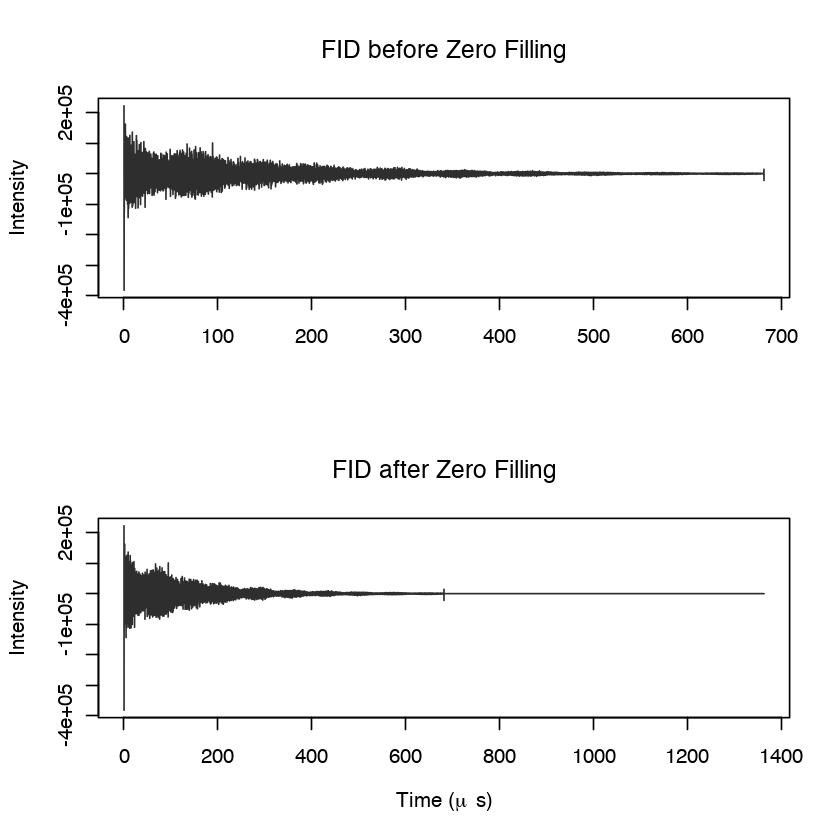

In [15]:
# Visualize changes
par(mfrow=c(2,1))
plot(time, Re(Fid_data.A[spectrIndex,]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", main="FID before Zero Filling")
time <- as.numeric(colnames(Fid_data.ZF))*1000
plot(time, Re(Fid_data.ZF[spectrIndex,]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Zero Filling")

In [16]:
# ==== FourierTransform =================
RawSpect_data.FT <- FourierTransform(Fid_data.ZF, Fid_info)

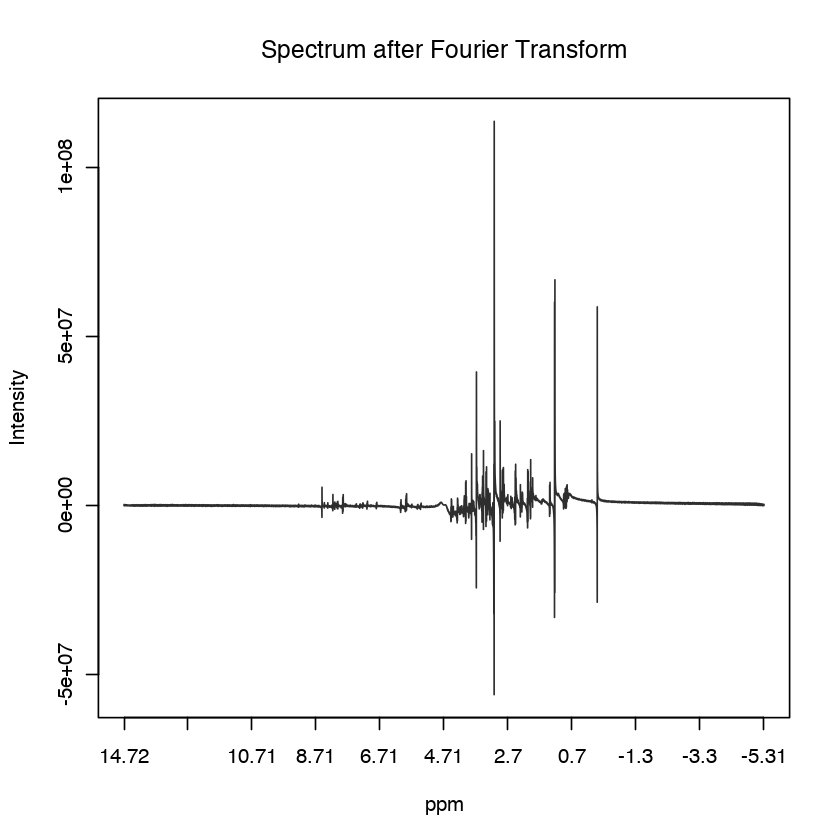

In [17]:
# Visualize Changes
plot(Re(RawSpect_data.FT[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Fourier Transform")
at <- seq(1,dim(RawSpect_data.FT)[2], floor(dim(RawSpect_data.FT)[2]/10))
axis(side=1, at = at, 
     labels = round(as.numeric(colnames(RawSpect_data.FT)[at]),2))

In [18]:
# ==== ZeroOrderPhaseCorrection =================
Spectrum_data.ZOPC <- ZeroOrderPhaseCorrection(RawSpect_data.FT)

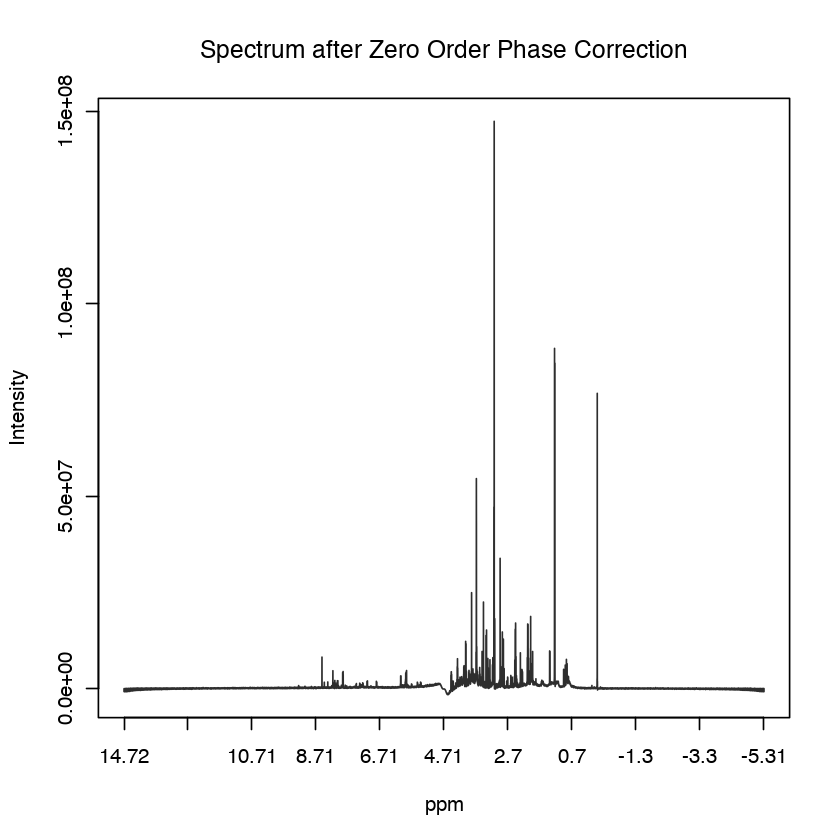

In [19]:
# Visualize Changes
plot(Re(Spectrum_data.ZOPC[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Zero Order Phase Correction")
at <- seq(1,dim(Spectrum_data.ZOPC)[2], floor(dim(Spectrum_data.ZOPC)[2]/10))
axis(side=1, at = at, 
     labels = round(as.numeric(colnames(Spectrum_data.ZOPC)[at]),2))

[[1]]


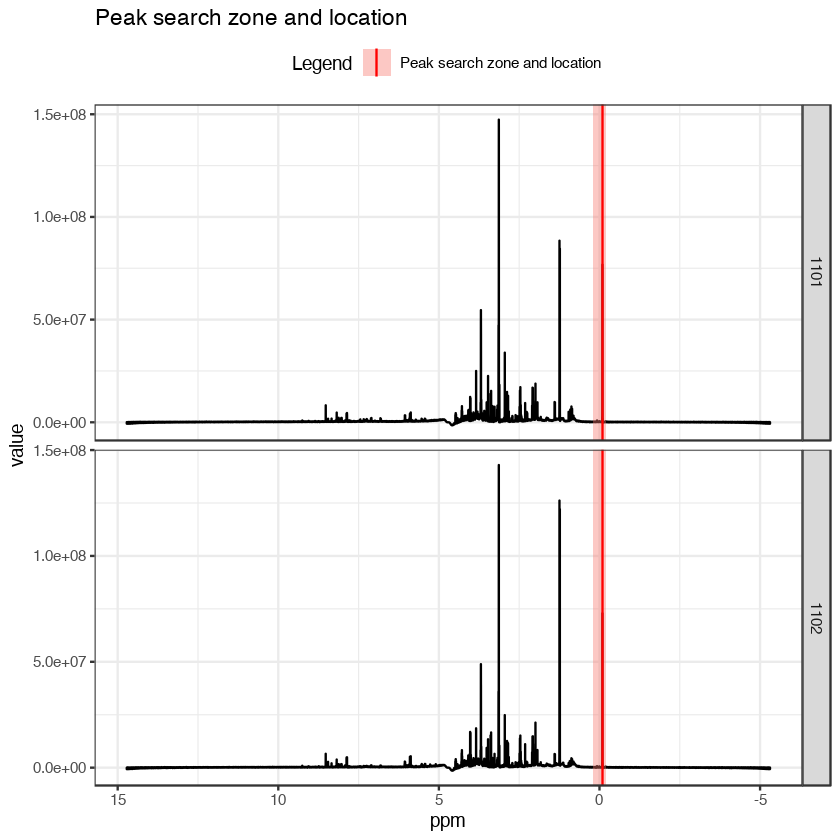

In [20]:
# ==== InternalReferencing =================
target.value <- 0
IR.res <- InternalReferencing(Spectrum_data.ZOPC, Fid_info,
                                        ppm.value = target.value,
                                        rowindex_graph = c(1,2))
IR.res$plots
Spectrum_data.IR <- IR.res$Spectrum_data

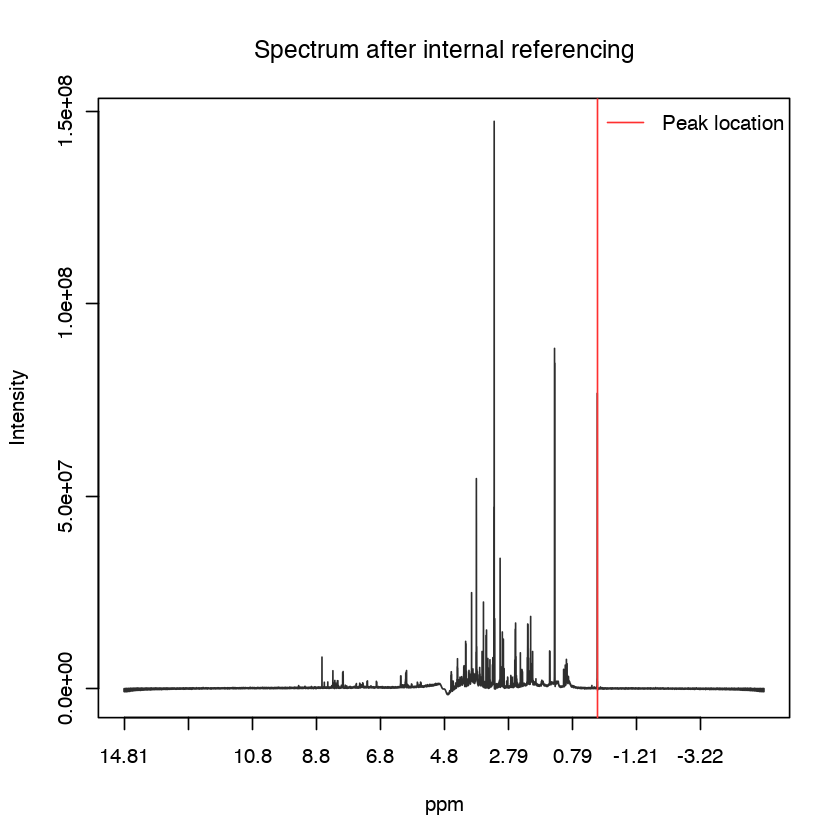

In [21]:
# Visualize changes
ppmvalues <- as.numeric(colnames(Spectrum_data.IR))
plot(Re(Spectrum_data.IR[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after internal referencing")
at <- seq(1,dim(Spectrum_data.IR)[2], floor(dim(Spectrum_data.IR)[2]/10))
axis(side=1, at = at, 
     labels = round(ppmvalues[at],2))
index <- which(abs(ppmvalues-target.value) == min(abs(ppmvalues-target.value)))
abline(v = index, col= col2)
legend("topright", bty = "n", legend = "Peak location", 
       col=col2,  lty = 1)

In [22]:
# ==== BaselineCorrection =================
BC.res <- BaselineCorrection(Spectrum_data.IR, returnBaseline = TRUE,
                             lambda.bc = 1e8, p.bc = 0.01)

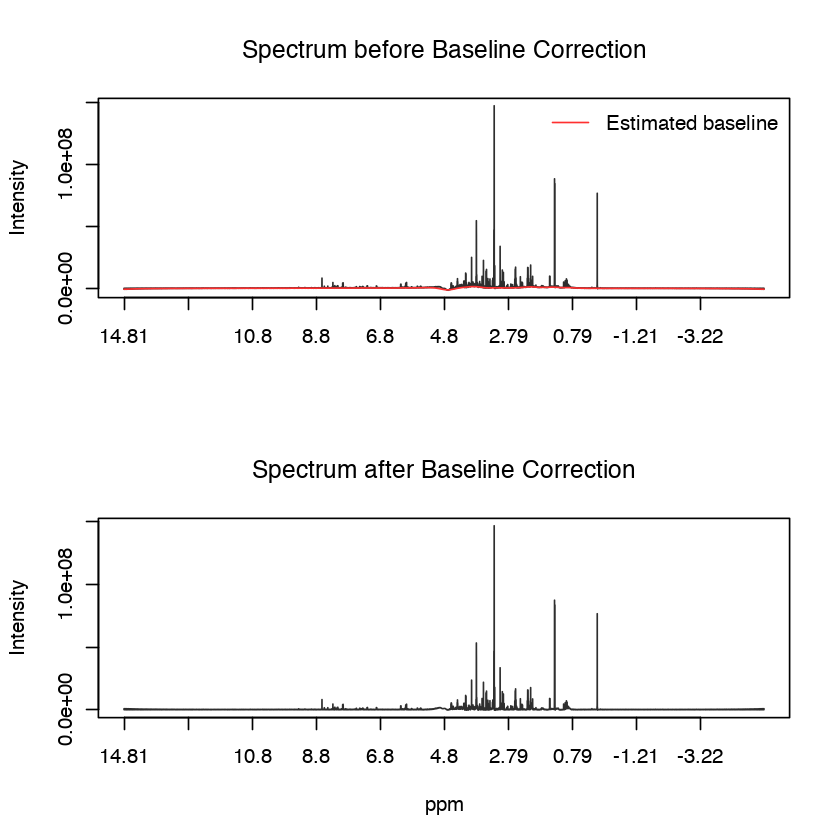

In [23]:
# visualize changes
par(mfrow=c(2,1))
Spectrum_data.BC <- BC.res[["Spectrum_data"]] 
Baseline <- BC.res[["Baseline"]]
plot(Re(Spectrum_data.IR[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "", 
     main="Spectrum before Baseline Correction")
at <- seq(1,dim(Spectrum_data.IR)[2], floor(dim(Spectrum_data.IR)[2]/10))
axis(side=1, at = at, labels = round(ppmvalues[at],2))
lines(Baseline[,1], col=col2)
legend("topright", bty = "n", legend = "Estimated baseline ", 
       col = col2,  lty = 1)
plot(Re(Spectrum_data.BC[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Baseline Correction")
axis(side=1, at = at, labels = round(ppmvalues[at],2))

In [24]:
# ==== NegativeValuesZeroing =================
Spectrum_data.NVZ <- NegativeValuesZeroing(Spectrum_data.BC)

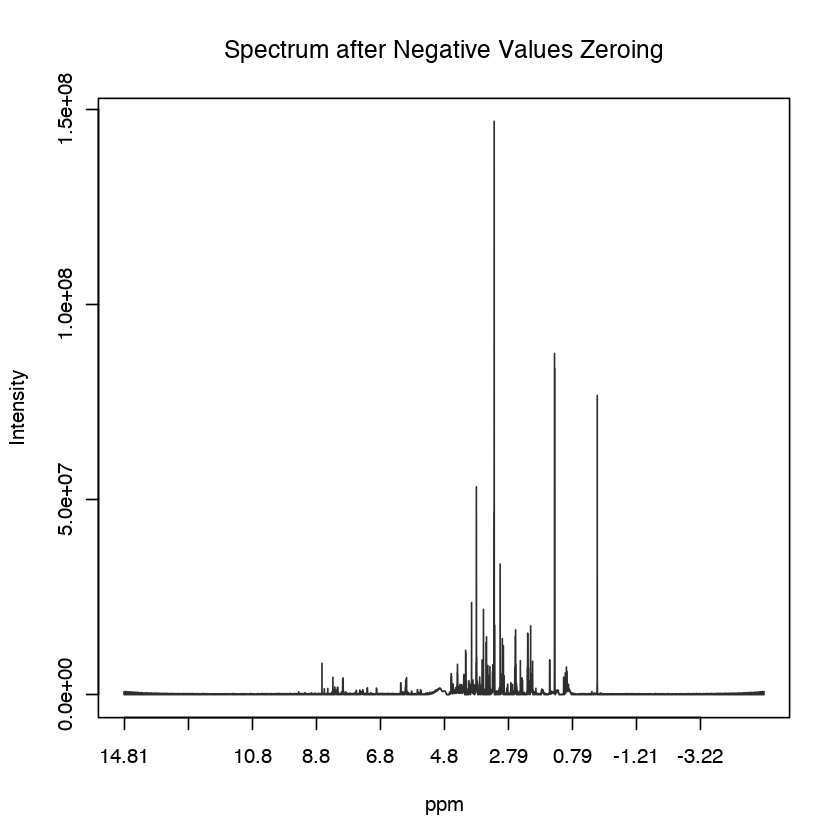

In [25]:
# visualize
plot(Re(Spectrum_data.NVZ[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Negative Values Zeroing")
axis(side=1, at = at, labels = round(ppmvalues[at],2))

In [26]:
# ==== Warping =================
W.res <- Warping(Spectrum_data.NVZ, returnWarpFunc = TRUE, 
                 reference.choice = "fixed")
Spectrum_data.W <- W.res[["Spectrum_data"]]
warp_func <- W.res[["Warp.func"]]

In [27]:
par(mfrow=c(2,1))
f <- c(21, 20, 24) # warped spectra index to draw
fen <- c(35560:36480) # x-window
ylim <- c(0, max(c(Re(Spectrum_data.NVZ[c(1, f),fen]), Re(Spectrum_data.W[c(spectrIndex, f),fen]))))

ERROR: Error in Spectrum_data.NVZ[c(1, f), fen]: subscript out of bounds


In [28]:
#Re(Spectrum_data.NVZ[1, fen])
nrow(sort(fen))

NULL

In [29]:
# Unwarped spectra
plot(Re(Spectrum_data.NVZ[1, fen]),   xaxt = "n", col=col2, ylab = "Intensity",ylim=ylim, type="l", xlab="ppm", main="Spectra before warping (real part - zoom)")
legend("topright", bty = "n", y.intersp = 0.8,legend=c("Unwarped spectra","Ref. spectrum "), lty = c(1,1), col=c(col1,col2))    
axis(side=1,  at = seq(1,length(fen), 114), labels = round(as.numeric(colnames(Spectrum_data.NVZ[,fen])[seq(1,length(fen), 114)]),2))
for (j in f) {
  graphics::lines(Re(Spectrum_data.NVZ[j,fen]), col=col1, type="l")
  }
# Warped spectra
plot(Re(Spectrum_data.W[1, fen]), col=col2, xaxt = "n",ylab = "Intensity",ylim=ylim, type="l", xlab="ppm", main="Warped spectra (real part - zoom)")
legend("topright",   bty = "n",  y.intersp = 0.8, legend=c("Warped spectra ","Ref. spectrum "), lty = c(1,1), col=c(col1,col2))    
axis(side=1,  at = seq(1,length(fen), 114), labels = round(as.numeric(colnames(Spectrum_data.NVZ[,fen])[seq(1,length(fen), 114)]),2))
for (j in f) {
  graphics::lines(Re(Spectrum_data.W[j,fen]), col=col1, type="l")
  }

ERROR: Error in Spectrum_data.NVZ[1, fen]: subscript out of bounds


In [30]:
# ==== WindowSelection =================
Spectrum_data.WS <- WindowSelection(Spectrum_data.W, from.ws = 10, 
                                    to.ws = 0.2)

In [31]:
dim(Spectrum_data.WS)
names(Spectrum_data.WS)

[1]   150 16033

NULL

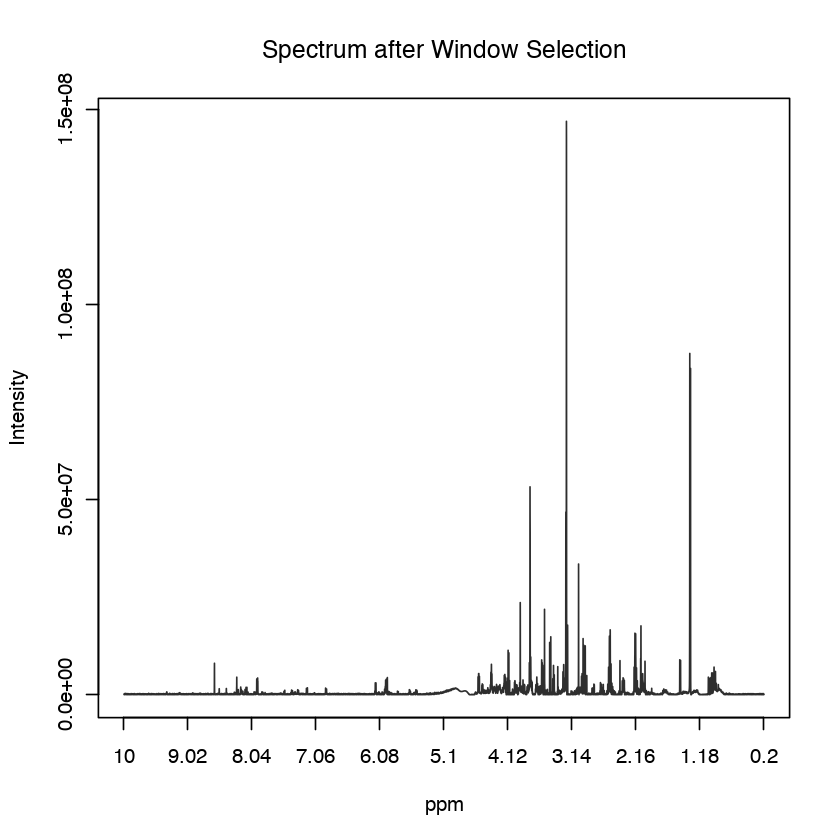

In [32]:
# visualize
at <- seq(1,dim(Spectrum_data.WS)[2], floor(dim(Spectrum_data.WS)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.WS))
plot(Re(Spectrum_data.WS[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Window Selection")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [33]:
# ==== Bucketing =================
# by defualt this function divides by the number of bins/buckets the user wants
# the default value is 500 bins/buckets. the spectra span from 0.2 to 10 ppm
# which means that each bin/bucket is 0.0196 ppm in width.
Spectrum_data.B500 <- Bucketing(Spectrum_data.WS, intmeth = "t", width = TRUE, mb = 0.02)
Spectrum_data.B5000 <- Bucketing(Spectrum_data.WS, intmeth = "t", width = TRUE, mb = 0.002)
#write.csv(Spectrum_data.B, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS1/output/PepsNMR_output/MTBLS326_PepsNMR_bin_testonly.csv")

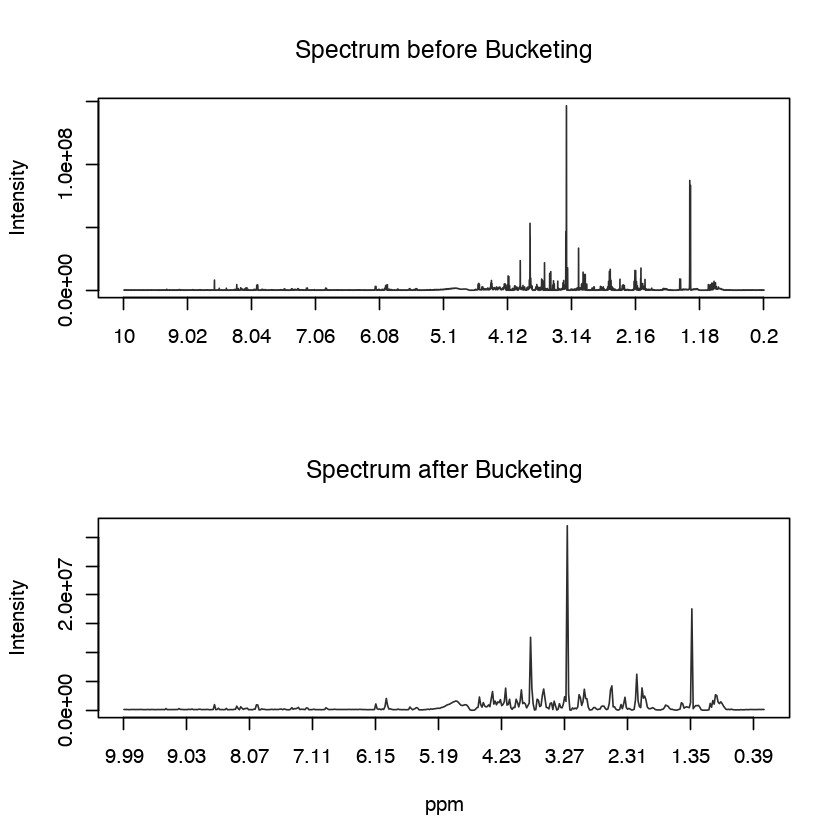

In [34]:
# visualize
par(mfrow=c(2,1))
at <- seq(1,dim(Spectrum_data.WS)[2], floor(dim(Spectrum_data.WS)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.WS))
plot(Re(Spectrum_data.WS[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "", 
     main = "Spectrum before Bucketing")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
at <- seq(1,dim(Spectrum_data.B500)[2], floor(dim(Spectrum_data.B500)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.B500))
plot(Re(Spectrum_data.B500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Bucketing")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [35]:
# ==== RegionRemoval =================
# "The type of spectra can be NULL to manually specify the area to be removed otherwise it is
#specified as typeofspectra = "serum" or typeofspectra = "urine" and the removed area are for
#typeofspectra = "serum": water (4.5 - 5.1 ppm) and for typeofspectra = "urine": water, uree [sic]
# and maleic acid (4.5 - 6.1 ppm)."
Spectrum_data.RR500 <- RegionRemoval(Spectrum_data.B500, 
                                     typeofspectra = "serum")
Spectrum_data.RR5000 <- RegionRemoval(Spectrum_data.B5000, 
                                      typeofspectra = "serum")

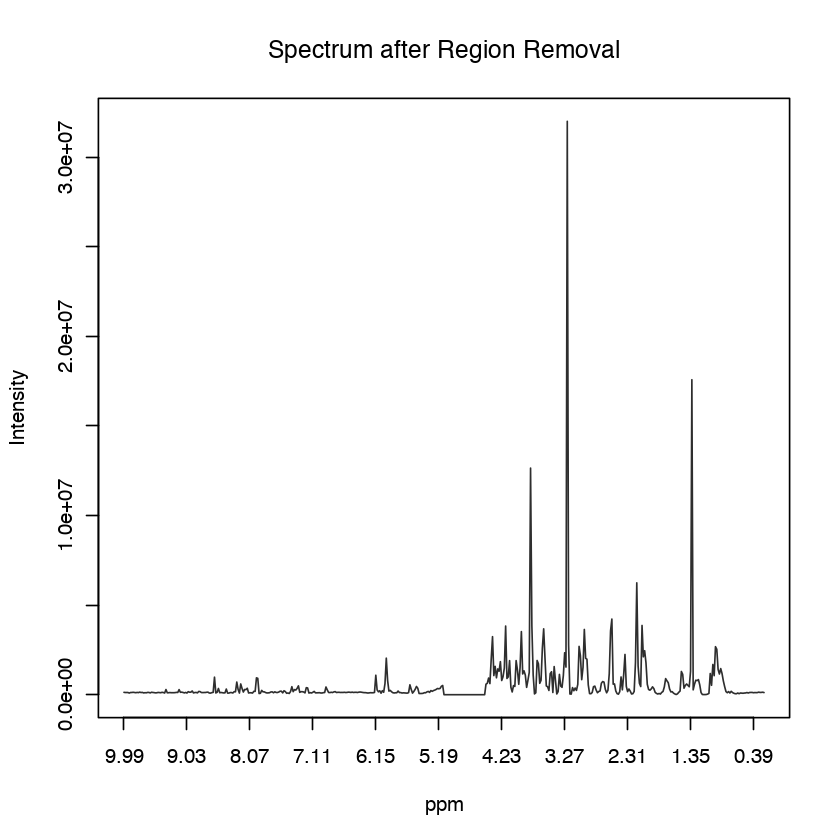

In [36]:
# visualize
plot(Re(Spectrum_data.RR500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Region Removal")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [37]:
# ==== Normalization =================
Spectrum_data.N500 <- Normalization(Spectrum_data.RR500, type.norm = "mean")
Spectrum_data.N5000 <- Normalization(Spectrum_data.RR5000, type.norm = "mean")
# renaming "Spectrum_data.N" to "data" to export data
# writing final output to csv
#Spectrum_data.N

In [39]:
write.csv(Spectrum_data.N500, file = norm_bin_500_path)
write.csv(Spectrum_data.N5000, file = norm_bin_5000_path)

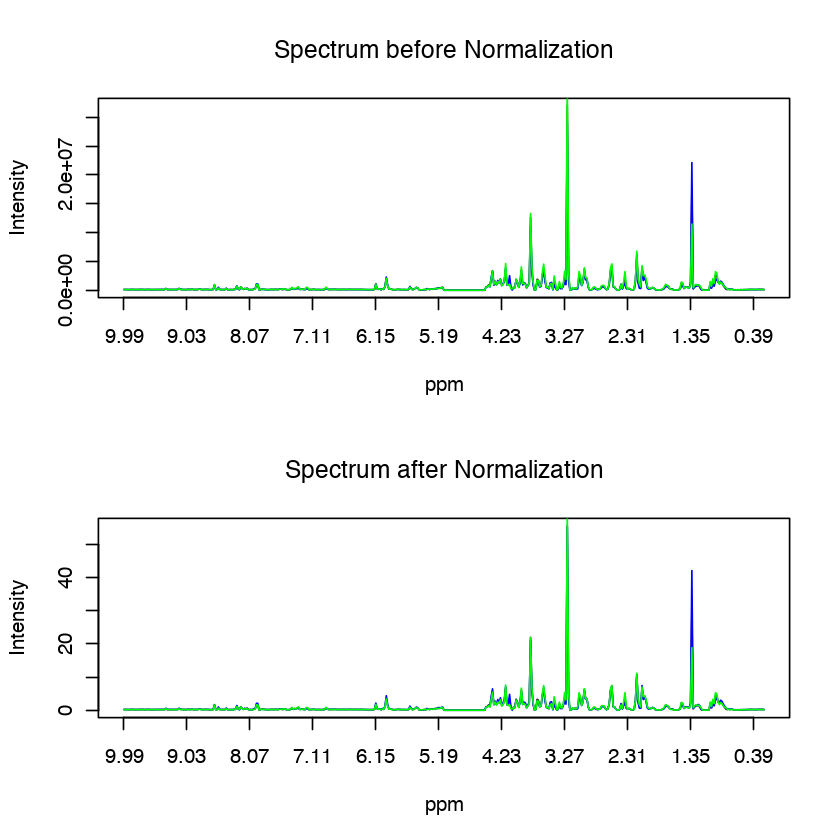

In [40]:
par(mfrow=c(2,1))
plot(Re(Spectrum_data.RR500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum before Normalization")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
lines(Re(Spectrum_data.RR500[2,]), col = "blue")
lines(Re(Spectrum_data.RR500[3,]), col = "green")
plot(Re(Spectrum_data.N500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Normalization")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
lines(Re(Spectrum_data.N500[2,]), col = "blue")
lines(Re(Spectrum_data.N500[3,]), col = "green")

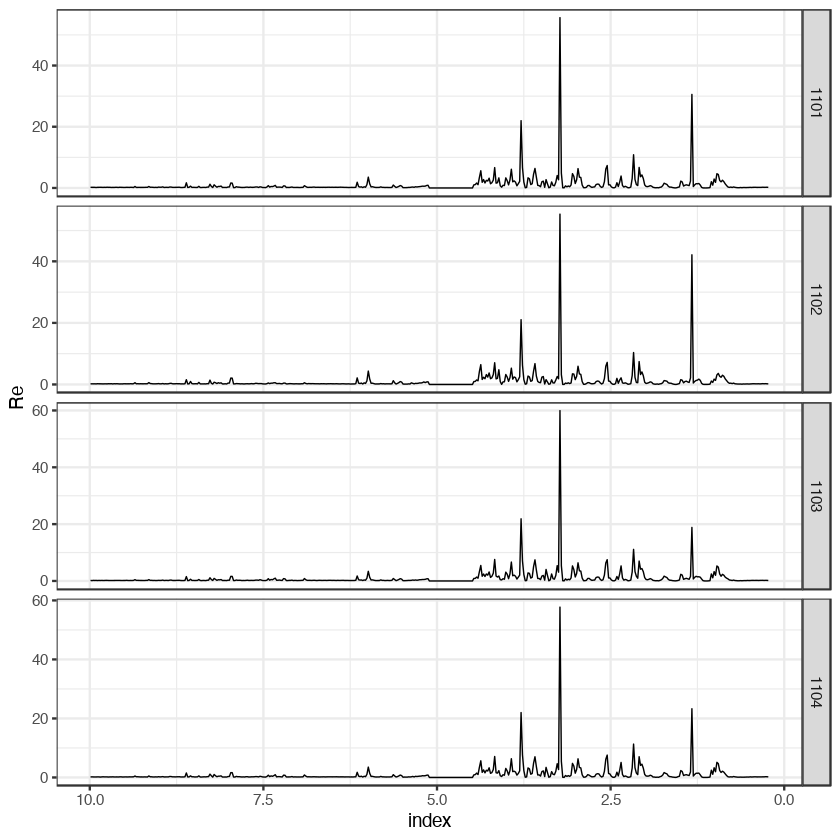

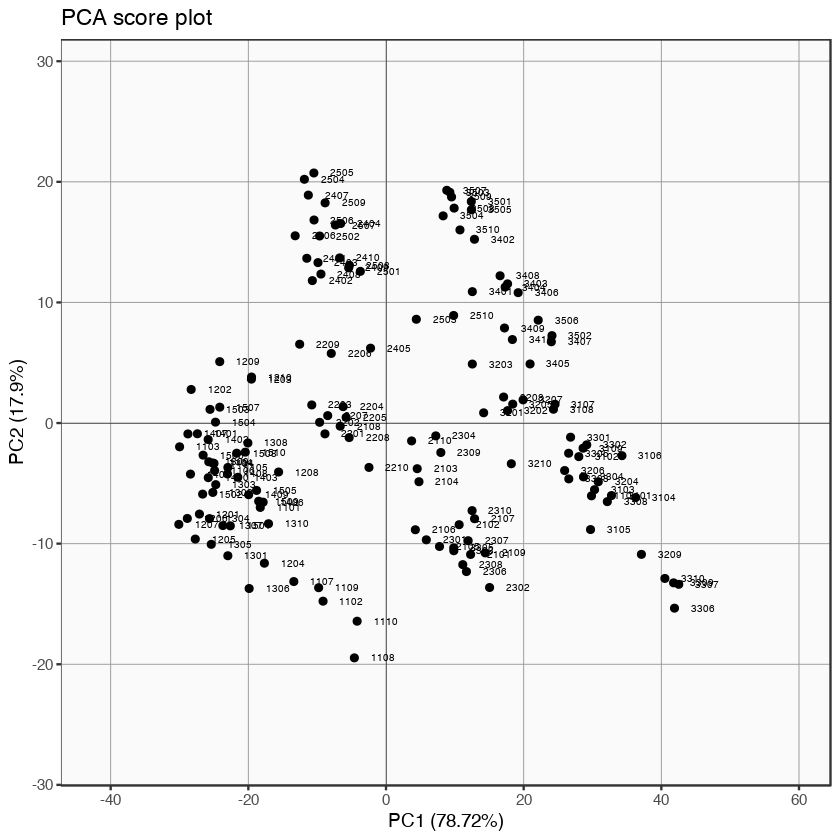

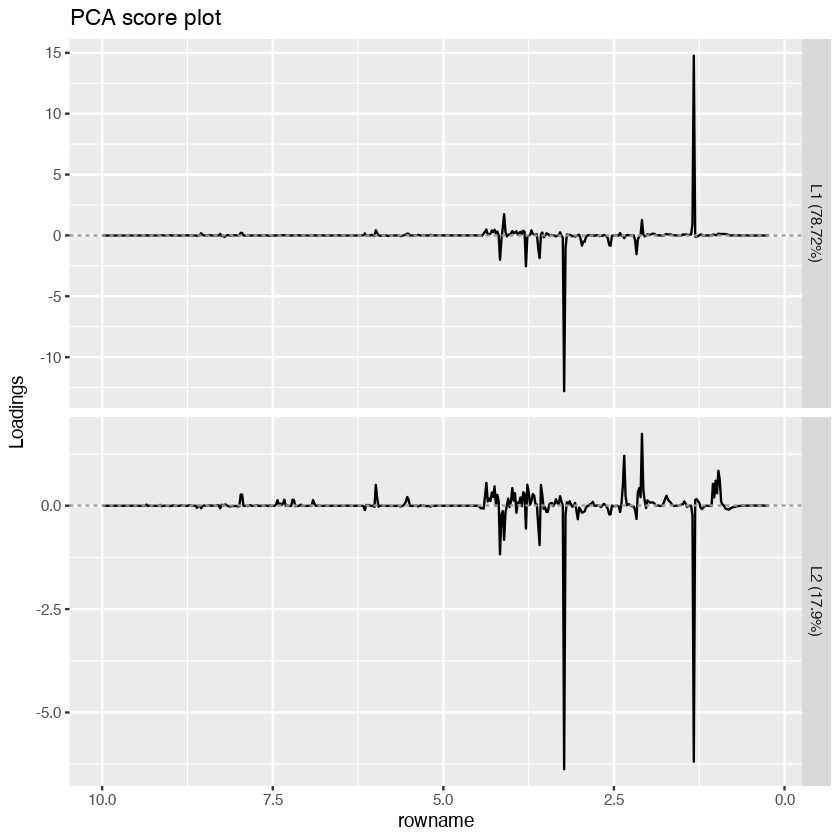

In [41]:
# ==== Drawing PCA ====
# Left class as blank
Draw(Spectrum_data.N500[1:4,], type.draw = c("signal"), 
     subtype= "stacked", output = c("default"))
# Left class as blank
Draw(Spectrum_data.N500, type.draw = c("pca"), 
     output = c("default"), 
     type.pca = "scores", height = 960, width = 1280)

Draw(Spectrum_data.N500, type.draw = c("pca"), 
     output = c("default"),
     type.pca = "loadings")